In [ ]:
# Impirt python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Data Set
df = pd.read_csv('/Fashion_Retail_Sales.csv')

In [ ]:
# Display first few rows
print("Dataset Loaded Successfully ")
print("Shape of dataset:", df.shape)
df.head()

Dataset Loaded Successfully 
Shape of dataset: (3400, 6)


,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,05/02/2023,NaN,Credit Card
1,4115,Tunic,2456.0,11/07/2023,2.0,Credit Card
2,4019,Tank Top,2102.0,23/03/2023,4.1,Cash
3,4097,Leggings,3126.0,15/03/2023,3.2,Cash
4,3997,Wallet,3003.0,27/11/2022,4.7,Cash


In [ ]:
# Basic Information
print("Columns in Dataset:\n", df.columns.tolist())
print("\nMissing values in each column:\n", df.isnull().sum())
print("\nDataset Info:")
df.info()

Columns in Dataset:
 ['Customer Reference ID', 'Item Purchased', 'Purchase Amount (USD)', 'Date Purchase', 'Review Rating', 'Payment Method']

Missing values in each column:
 Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  2750 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3076 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.5+ KB


In [ ]:
# Data Cleaning
# Rename columns for easier access
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


In [ ]:
# Handle missing Purchase Amount
df = df.dropna(subset=['Purchase_Amount_USD'])

In [ ]:
# Convert Date column to datetime
df['Date_Purchase'] = pd.to_datetime(df['Date_Purchase'], errors='coerce')

In [ ]:
# Drop rows where date is missing
df = df.dropna(subset=['Date_Purchase'])

In [ ]:
# Sort by date
df = df.sort_values('Date_Purchase')
df.reset_index(drop=True, inplace=True)

In [ ]:
print("Cleaned Dataset Shape:", df.shape)
df.head()

Cleaned Dataset Shape: (1104, 6)


,Customer_Reference_ID,Item_Purchased,Purchase_Amount_USD,Date_Purchase,Review_Rating,Payment_Method
0,4081,Loafers,144.0,2022-01-11,1.2,Credit Card
1,3966,Boots,181.0,2022-01-11,NaN,Credit Card
2,4069,Flannel Shirt,64.0,2022-01-11,3.5,Cash
3,3986,Socks,37.0,2022-01-11,1.1,Credit Card
4,3990,Pajamas,23.0,2022-01-11,4.2,Credit Card


In [ ]:
# Descriptive Statistics
print("Descriptive Statistics for Purchase Amount:")
print(df['Purchase_Amount_USD'].describe())


Descriptive Statistics for Purchase Amount:
count    1104.000000
mean      161.583333
std       422.520903
min        10.000000
25%        58.750000
50%       112.000000
75%       157.000000
max      4661.000000
Name: Purchase_Amount_USD, dtype: float64


In [ ]:
print("\nMean Purchase Amount:", df['Purchase_Amount_USD'].mean())
print("Median Purchase Amount:", df['Purchase_Amount_USD'].median())
print("Mode Purchase Amount:", df['Purchase_Amount_USD'].mode()[0])
print("Standard Deviation:", df['Purchase_Amount_USD'].std())


Mean Purchase Amount: 161.58333333333334
Median Purchase Amount: 112.0
Mode Purchase Amount: 44.0
Standard Deviation: 422.5209027573053


In [ ]:
# If review rating exists
if 'Review_Rating' in df.columns:
    print("\nReview Rating Summary:")
    print(df['Review_Rating'].describe())


Review Rating Summary:
count    994.000000
mean       3.032394
std        1.157495
min        1.000000
25%        2.000000
50%        3.100000
75%        4.075000
max        5.000000
Name: Review_Rating, dtype: float64


In [ ]:
# Time Series Analysis
# Daily Sales Trend
daily_sales = df.groupby('Date_Purchase')['Purchase_Amount_USD'].sum().reset_index()


In [ ]:
# Monthly Sales Trend
df['Month'] = df['Date_Purchase'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Purchase_Amount_USD'].sum().reset_index()

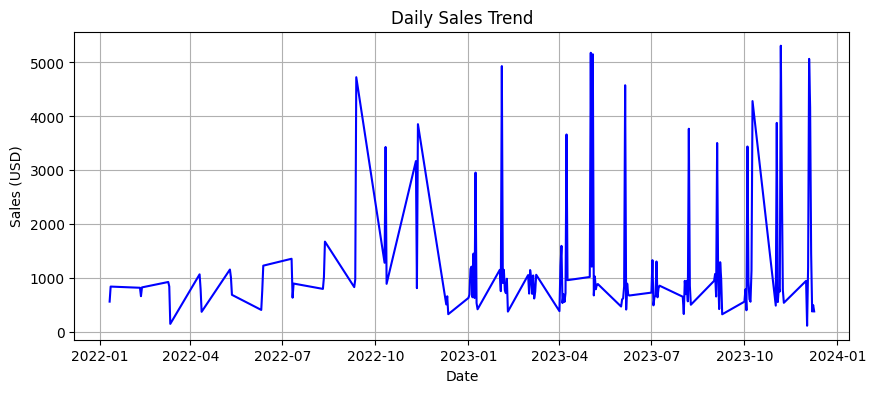

In [ ]:
# Plot Daily Sales
plt.figure(figsize=(10,4))
plt.plot(daily_sales['Date_Purchase'], daily_sales['Purchase_Amount_USD'], color='blue')
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales (USD)")
plt.grid(True)
plt.show()


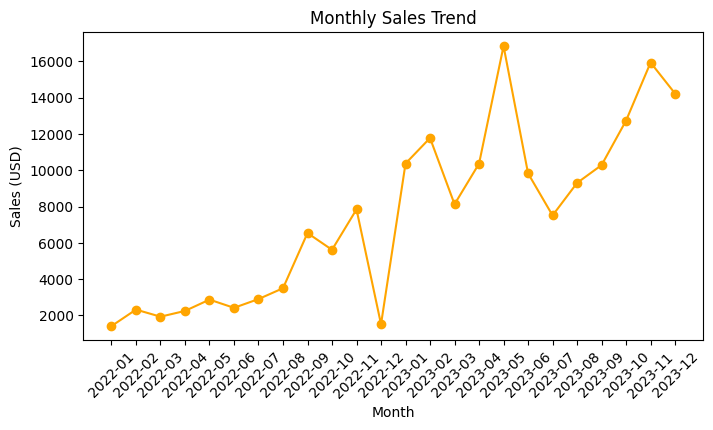

In [ ]:
# Plot Monthly Sales
plt.figure(figsize=(8,4))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Purchase_Amount_USD'], marker='o', color='orange')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales (USD)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Customer and Product Analysis
# Top 10 Customers by Purchase Amount
top_customers = df.groupby('Customer_Reference_ID')['Purchase_Amount_USD'].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Total Purchase Amount:")
print(top_customers)

Top 10 Customers by Total Purchase Amount:
Customer_Reference_ID
4075    5604.0
4018    5125.0
4010    4895.0
3986    4627.0
4068    4553.0
3981    4323.0
4109    4029.0
3972    3838.0
4108    3785.0
4115    3761.0
Name: Purchase_Amount_USD, dtype: float64


In [ ]:
# Top 10 Items Purchased
top_items = df.groupby('Item_Purchased')['Purchase_Amount_USD'].agg(['count','sum']).sort_values('count', ascending=False).head(10)
print("\nTop 10 Items Purchased:")
print(top_items)


Top 10 Items Purchased:
                count     sum
Item_Purchased               
Belt               33  3559.0
Skirt              32  3508.0
Sunglasses         32  3200.0
Vest               31  3059.0
Pajamas            31  7307.0
Camisole           30  2934.0
Gloves             30  7113.0
Pants              27  5680.0
Loafers            27  7334.0
Flannel Shirt      25  2552.0


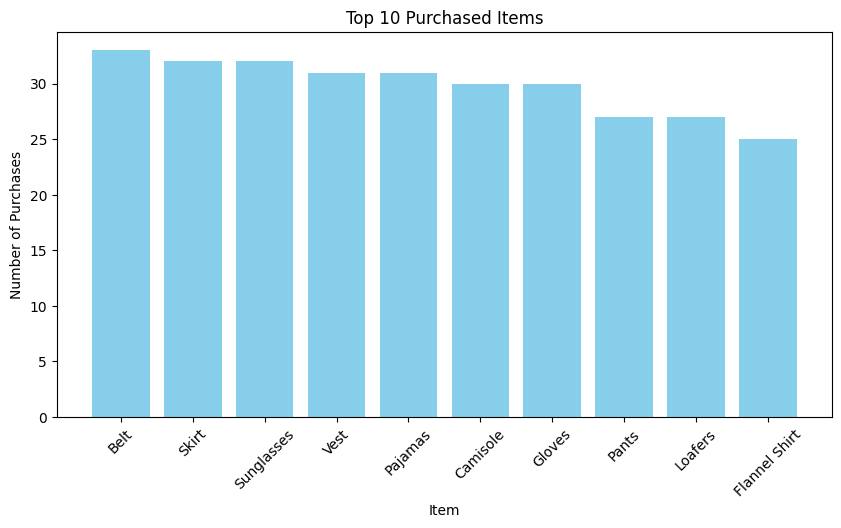

In [ ]:
# Visualization

# Bar Chart: Top 10 Purchased Items
plt.figure(figsize=(10,5))
plt.bar(top_items.index, top_items['count'], color='skyblue')
plt.title('Top 10 Purchased Items')
plt.xlabel('Item')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

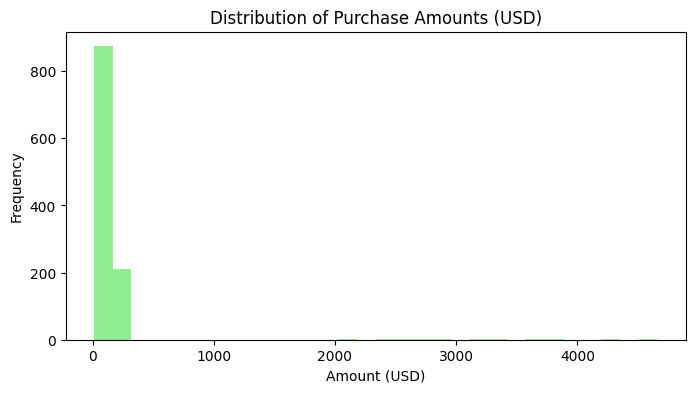

In [ ]:
# Histogram: Distribution of Purchase Amounts
plt.figure(figsize=(8,4))
plt.hist(df['Purchase_Amount_USD'], bins=30, color='lightgreen')
plt.title('Distribution of Purchase Amounts (USD)')
plt.xlabel('Amount (USD)')
plt.ylabel('Frequency')
plt.show()

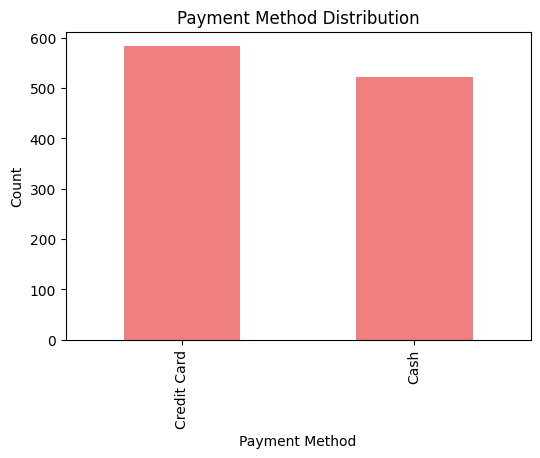

In [ ]:
# Payment Method Analysis
if 'Payment_Method' in df.columns:
    plt.figure(figsize=(6,4))
    df['Payment_Method'].value_counts().plot(kind='bar', color='lightcoral')
    plt.title("Payment Method Distribution")
    plt.xlabel("Payment Method")
    plt.ylabel("Count")
    plt.show()


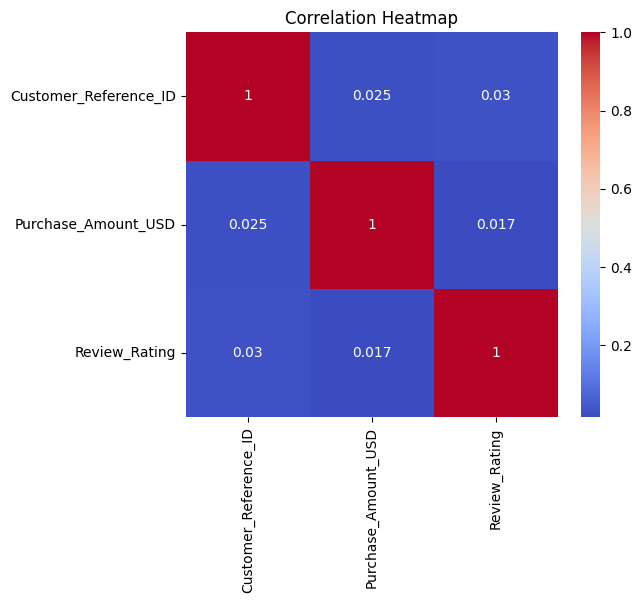

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Recommendations & Insights

print("""
 Key Insights:
1. Top customers contribute significantly to total sales — consider loyalty rewards.
2. Sales show clear monthly trends — focus promotions during high-performing months.
3. High-selling products can be restocked or bundled for offers.
4. Payment method analysis helps identify preferred customer payment channels.
5. Ratings can indicate customer satisfaction and improvement areas.

This completes the EDA project for the Oasis Infobyte Internship.
""")


 Key Insights:
1. Top customers contribute significantly to total sales — consider loyalty rewards.
2. Sales show clear monthly trends — focus promotions during high-performing months.
3. High-selling products can be restocked or bundled for offers.
4. Payment method analysis helps identify preferred customer payment channels.
5. Ratings can indicate customer satisfaction and improvement areas.

This completes the EDA project for the Oasis Infobyte Internship.

